# **Linear/Logistic Regression 실습 및 결과 해석**

## **1. 데이터 불러오기 (자전거, 자궁암)**

In [518]:
# 구글 드라이브에 실습 파일을 넣고 불러오기
# from google.colab import drive
# drive.mount('/content/drive')

In [519]:
# 자전거, 자궁암 대여 데이터 불러오기

import pandas as pd

# df_bike = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/해석가능인공지능_실습자료/bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")

# df_cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/해석가능인공지능_실습자료/cancer.csv", engine = "python", encoding = "euc-kr")
df_bike = pd.read_csv(r"C:\001. Python\70.설명가능인공지능_3주차_실습\bike-sharing-daily.csv", engine = "python", encoding = "euc-kr")


df_cancer = pd.read_csv(r"C:\001. Python\70.설명가능인공지능_3주차_실습\cancer.csv", engine = "python", encoding = "euc-kr")

print(df_bike.shape) # 몇행 몇열로 이루어져 있는지 확인인
print(df_cancer.shape)

(731, 16)
(858, 16)


## **2. Linear regression (자전거 데이터)**

지난 시간 전처리된 df_bike 로 Linear regression을 수행 하면 될까요? 문제는 무엇인가요?

예를 들어, season을 이대로 처리할 경우 Winter, Spring, Summer, Fall이 자전거 대여에 주는 영향력을 전혀 알 수 없음.

In [520]:
df_bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [521]:
df_cancer.head(10)

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
1,15,1,14,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
2,34,1,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
3,52,5,16,4,1,37.000000,1,3.0,0,0.0,0,0,0,1,1,0
4,46,3,21,4,0,0.000000,1,15.0,0,0.0,0,0,0,1,1,0
5,42,3,23,2,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
6,51,3,17,6,1,34.000000,0,0.0,1,7.0,0,0,0,1,1,1
7,26,1,26,3,0,0.000000,1,2.0,1,7.0,0,0,0,1,1,0
8,45,1,20,5,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
9,44,3,15,1,1,1.266973,0,0.0,0,0.0,0,0,0,1,1,0


## **2.1 데이터 전처리**

### **2.1.1 One-hot encoding**

season, weathersit 을 one-hot encoding으로 수행해 줘야 함.

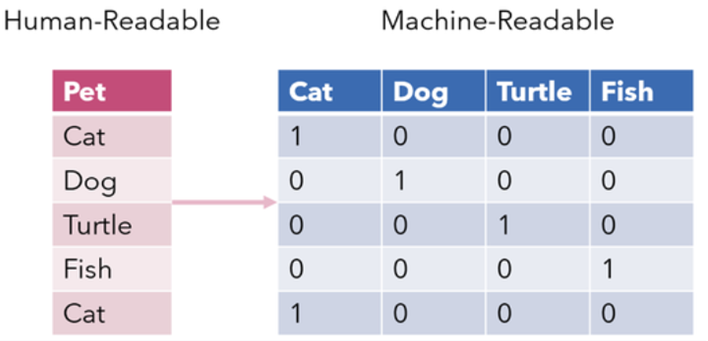

In [522]:
# Season을 one-hot encoding 수행하기
# pd.get_dummies()는 범주형 변수(season)를 이진 벡터로 변환하는 역할
# 범주형 변수 3개 이상일때는 one-hot encoding을 해야함

pd.get_dummies(df_bike['season'])

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
726,True,False,False,False
727,True,False,False,False
728,True,False,False,False
729,True,False,False,False


In [523]:
# Weathersit을 one-hot encoding 수행하기

pd.get_dummies(df_bike['weathersit'])

,1,2,3
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
726,False,True,False
727,False,True,False
728,False,True,False
729,True,False,False


In [524]:
# One-hot encoding된 열 추가하기
# season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
# pd.get_dummies(df_bike, columns=['season', 'weathersit'])
# season 컬럼을 season_1, season_2, season_3, season_4로 변환
# weathersit 컬럼을 weathersit_1, weathersit_2, weathersit_3로 변환
# 원래 season, weathersit 컬럼은 제거됨.

df_bike=pd.get_dummies(df_bike, columns=['season','weathersit'])

df_bike

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,...,casual,registered,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0,1,0,6,0,0.344167,0.363625,0.805833,...,331,654,985,True,False,False,False,False,True,False
1,2,2011-01-02,0,1,0,0,0,0.363478,0.353739,0.696087,...,131,670,801,True,False,False,False,False,True,False
2,3,2011-01-03,0,1,0,1,1,0.196364,0.189405,0.437273,...,120,1229,1349,True,False,False,False,True,False,False
3,4,2011-01-04,0,1,0,2,1,0.200000,0.212122,0.590435,...,108,1454,1562,True,False,False,False,True,False,False
4,5,2011-01-05,0,1,0,3,1,0.226957,0.229270,0.436957,...,82,1518,1600,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,12,0,4,1,0.254167,0.226642,0.652917,...,247,1867,2114,True,False,False,False,False,True,False
727,728,2012-12-28,1,12,0,5,1,0.253333,0.255046,0.590000,...,644,2451,3095,True,False,False,False,False,True,False
728,729,2012-12-29,1,12,0,6,0,0.253333,0.242400,0.752917,...,159,1182,1341,True,False,False,False,False,True,False
729,730,2012-12-30,1,12,0,0,0,0.255833,0.231700,0.483333,...,364,1432,1796,True,False,False,False,True,False,False


### **2.1.2 Multicollinearity가 높은 독립변수 제거**

Linear regression은 독립변수 간 상관관계가 없다는 가정하에 해석이 되므로 상관관계가 높은 독립변수를 파악하고 삭제하는게 필요함

In [525]:
# 연속형 데이터에 대해서만 correlation 계산이 가능하므로 범주형 변수는 제외
df_bike_features=df_bike.loc[:,['temp','hum','windspeed']]

df_bike_features.corr()

# temp와 hum : 0.126963 → 약한 양의 상관관계 (거의 상관없음)
# temp와 windspeed : -0.157944 → 약한 음의 상관관계 (거의 상관없음)
# hum와 windspeed : -0.248489 → 약한 음음의 상관관계 (거의 상관없음)

,temp,hum,windspeed
temp,1.000000,0.126963,-0.157944
hum,0.126963,1.000000,-0.248489
windspeed,-0.157944,-0.248489,1.000000


<Axes: >

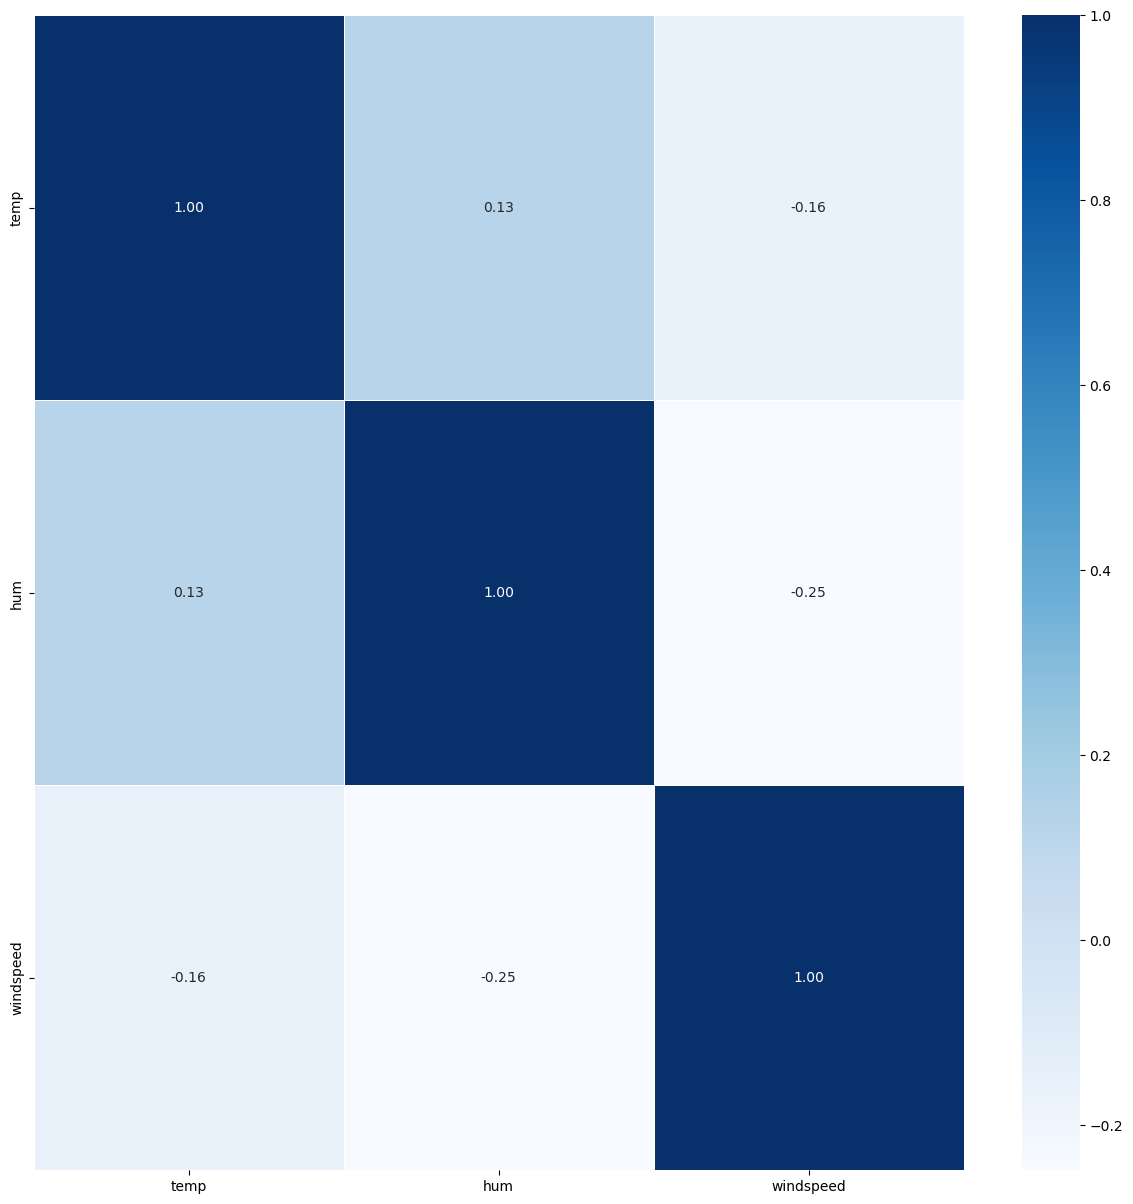

In [526]:
# 상관관계 시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(data = df_bike_features.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

상관관계 계산 결과 독립변수 간 상관관계가 미약하므로 모두 Linear regression 모델 건설에 사용해도 무방함

### **Multicollinearity를 파악하기 위한 다른 방법**

상관관계 분석은 정량적으로 어느정도 상관관계가 있으면 독립변수 간에 상관관계가 있는지 수치적으로 제시해주지 못함. <br>

VIF (Variance Inflation Factors)를 이용하면 VIF가 10 이상인 경우 다중공선성이 있다고 판단 (엄격하게 판단할 경우 VIF 수치 5 이상일 때 다중공선성 문제)

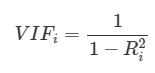


In [527]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # VIF 계산을 위한 데이터 준비 (상수 추가 필요 없음)
# vif_data = df_bike_features.copy()

# # VIF 계산
# vif = pd.DataFrame()
# vif["Feature"] = vif_data.columns
# vif["VIF"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# vif

### **2.1.3 Train/Test set 나누기**

독립변수 (x), 종속변수 (y)를 구분하고 train/test set을 나누어 줘야 함

In [528]:
# x feature, 예측 변수 y 정의
x_bike=df_bike.loc[:,['yr','mnth','holiday','weekday','workingday','temp','hum','windspeed','season_1','season_2','season_3','season_4','weathersit_1','weathersit_2','weathersit_3']]
y_bike=df_bike['cnt']
# x_bike: 자전거 대여량을 예측하기 위한 독립 변수(features)로, yr(연도), mnth(월), holiday(공휴일), 
# weekday(요일), workingday(근무일 여부), temp(온도), hum(습도), windspeed(풍속), 
# 그리고 계절(season_1 ~ season_4), 날씨(weathersit_1 ~ weathersit_3) 등을 포함함.
# y_bike: 예측할 종속 변수로, cnt(총 대여 수)를 선택.

# min-max 정규화는 train 데이터만 함 / test 데이터는 건드리지 않음

# train/test set으로 나누기
from sklearn.model_selection import train_test_split
# x_train_bike, x_test_bike, y_train_bike, y_test_bike = train_test_split(x_bike, y_bike, test_size = .2)
x_train_bike, x_test_bike, y_train_bike, y_test_bike = train_test_split(x_bike, y_bike, test_size = .2, random_state=10) # 고정되게 train/test set을 주기 위해서는 random_state 값을 주어야 함

### **2.1.4 결측치 확인**

Train set과 Test set을 나눈 이후 결측치 확인

In [529]:
# 한 열의 데이터가 모두 결측값인 열이 있는지 확인
x_train_bike.columns[x_train_bike.isna().all()]

# x_train_bike.isna() → True/False로 결측값(NaN) 여부를 나타내는 DataFrame 생성
# .all() → 각 컬럼에서 모든 값이 NaN인 경우 True 반환
# x_train_bike.columns[...] → 해당 컬럼 이름 추출


Index([], dtype='object')

In [530]:
# 한 열의 데이터가 모두 결측값인 열이 있는지 확인
x_test_bike.columns[x_test_bike.isna().all()]

Index([], dtype='object')

Train과 Test set 모두에 결측치가 없으니 결측 칼럼 제거 없이 다음으로 넘어갑니다.

## **2.2 Linear regression 모델 건설하기**

In [531]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# LinearRegression() → 선형 회귀 모델
# r2_score() → 모델의 설명력(R²)을 평가

# Linear regression 모델 건설
lr = LinearRegression()
lr.fit(x_train_bike, y_train_bike) #학습 데이터로 선형 회귀 모델을 훈련
pred = lr.predict(x_test_bike) #테스트 데이터(x_test_bike)에 대한 자전거 대여량 예측값 생성

#성능 확인
print("R2",r2_score(y_test_bike,pred))
# 결과: R² (결정계수, 모델이 데이터를 얼마나 잘 설명하는지 측정)
# R² 값이 1에 가까울수록 모델이 데이터를 잘 설명함.


R2 0.8062491667651699


## **2.3 Linear regression 모델 해석하기**

건설된 LR 모델을 해석하여 독립변수가 종속변수에 어떠한 영향을 미치는지 알아봅시다.

[ 2039.00944701    -7.11395093  -619.27988723    67.52388723
   111.30794515  5143.41458093 -1040.27439532 -2908.34573386
  -865.0563062    256.2151809    -54.53907976   663.38020507
   773.27683614   338.70695949 -1111.98379563]
temp            5143.414581
yr              2039.009447
weathersit_1     773.276836
season_4         663.380205
weathersit_2     338.706959
season_2         256.215181
workingday       111.307945
weekday           67.523887
mnth              -7.113951
season_3         -54.539080
holiday         -619.279887
season_1        -865.056306
hum            -1040.274395
weathersit_3   -1111.983796
windspeed      -2908.345734
dtype: float64


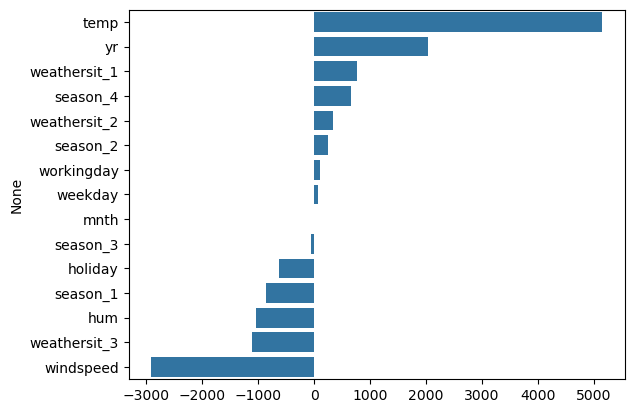

In [532]:
import seaborn as sns

#Coefficients 확인
print(lr.coef_)

#Coefficients 시각화
coef_bike = pd.Series(lr.coef_, index = x_bike.columns)
coef_sort_bike = coef_bike.sort_values(ascending=False)
sns.barplot(x=coef_sort_bike.values, y=coef_sort_bike.index)

print(coef_sort_bike)

# 대여량 증가에 큰 영향을 미치는 Feature
# season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
# pd.get_dummies(df_bike, columns=['season', 'weathersit'])
# season 컬럼을 season_1, season_2, season_3, season_4로 변환
# weathersit 컬럼을 weathersit_1, weathersit_2, weathersit_3로 변환


# temp (5143.41) → 온도가 높을수록 대여량 증가
# yr (2039.01) → 연도가 증가할수록(시간이 흐를수록) 대여량 증가
# weathersit_1 (773.28) → 날씨가 좋을수록 대여량 증가
# season_4 (663.38) → 가을(4)이 자전거 대여에 긍정적인 영향
# 대여량 감소에 큰 영향을 미치는 Feature

# windspeed (-2908.35) → 풍속이 강할수록 대여량 감소
# weathersit_3 (-1111.98) → 날씨가 안 좋을수록(구름 많고 비 오는 경우) 대여량 감소
# hum (-1040.27) → 습도가 높을수록 대여량 감소
# season_1 (-865.06) → 봄(1)에는 대여량이 감소하는 경향
# holiday (-619.28) → 공휴일에는 대여량이 줄어드는 경향


### **[실습]**
위의 결과를 기반으로 Linear regression 모델을 해석하여 아래 질문에 대답해 봅시다.

* 봄, 여름, 가을, 겨울은 자전거 대여수에 각각 어떠한 영향을 미치나요?
* 기상 상황은 자전거 대여수에 어떠한 영향을 미치나요?
* 온도, 습도, 바람세기는 자전거 대여수에 어떠한 영향을 미치나요?

### **🔹 Linear Regression 모델 해석 (질문에 대한 답변)**  

---

### **1️⃣ 봄, 여름, 가을, 겨울은 자전거 대여 수에 각각 어떠한 영향을 미치나요?**
season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
✅ **계수 분석**  
| Feature    | Coefficient | 해석 |
|------------|------------|------------------------------|
| `season_1` (겨울)  | -865.06  | 겨울에는 대여량이 감소하는 경향 |
| `season_2` (봄) | 256.22   | 봄에는 대여량이 약간 증가 |
| `season_3` (여름) | -54.54   | 여름은 거의 영향 없음 (약간 감소) |
| `season_4` (가을) | 663.38   | 가을을에는 대여량이 증가하는 경향 |

---

### **2️⃣ 기상 상황은 자전거 대여 수에 어떠한 영향을 미치나요?**
✅ **계수 분석**  
| Feature           | Coefficient | 해석 |
|------------------|------------|------------------------------|
| `weathersit_1` (좋은 날씨) | **+773.28** | 날씨가 좋을수록 대여량 증가 |
| `weathersit_2` (흐린 날씨) | **+338.71** | 흐린 날씨도 대여량에 긍정적 영향 |
| `weathersit_3` (비/눈 오는 날씨) | **-1111.98** | 비/눈이 오면 대여량 급감 |


---

### **3️⃣ 온도, 습도, 바람 세기는 자전거 대여 수에 어떠한 영향을 미치나요?**
✅ **계수 분석**  
| Feature      | Coefficient | 해석 |
|-------------|------------|------------------------------|
| `temp` (온도)      | **+5143.41** | 온도가 높을수록 대여량 증가 (가장 큰 영향) |
| `hum` (습도)       | **-1040.27** | 습도가 높을수록 대여량 감소 |
| `windspeed` (풍속) | **-2908.35** | 바람이 강할수록 대여량 급감 |

📌 **결론:**  
- **온도(`temp`)는 가장 중요한 변수이며, 온도가 높을수록 대여량 증가**  
  → **여름철에 대여량이 증가하는 주된 이유가 온도 때문**  
- **습도(`hum`)가 높아지면 대여량 감소**  
  → 습한 날씨는 불쾌함을 유발하여 자전거 이용을 감소시킴  
- **바람이 강할수록(`windspeed`) 대여량 급격히 감소**  
  → 강풍이 불면 자전거 타기가 어려워지므로 대여가 줄어드는 경향

---

## **3. Logistic regression (자궁암 데이터)**

**Linear regression과 다르게 logistic regression에서는 Multicollinearity 여부를 파악하지 않는 이유는 무엇일까요?**

https://dacon.io/forum/408387

### **🔹 Linear Regression vs. Logistic Regression에서 다중공선성(Multicollinearity)의 차이점**

---

### ✅ **Linear Regression에서 다중공선성 문제**
- 선형 회귀(Linear Regression)는 **종속 변수(타겟 변수, `Y`)가 연속형**인 경우 사용됩니다.
- 다중공선성이 있으면 **회귀 계수(β)의 불안정성 증가** → 작은 변화에도 모델이 크게 변할 수 있음.
- 다중공선성이 크면 **계수의 해석이 어려워지고, 과적합(overfitting) 가능성이 증가**.
- 따라서 **VIF(분산 팽창 계수, Variance Inflation Factor)** 를 활용하여 다중공선성을 확인하는 것이 중요함.

---

### ✅ **Logistic Regression에서 다중공선성 문제**
- 로지스틱 회귀(Logistic Regression)는 **종속 변수(타겟 변수, `Y`)가 이진 분류(0/1) 또는 다중 분류**인 경우 사용됩니다.
- **로지스틱 회귀의 목적은 "확률 모델링"**  
  → 예측 변수(`X`)를 사용하여 특정 클래스(예: `Y=1`)에 속할 확률을 추정.
- **선형 회귀와 다르게, 예측값이 직접적으로 종속 변수(Y)에 영향을 미치지 않음.**  
  → 대신 **시그모이드(Sigmoid) 함수**를 거쳐 확률로 변환됨.

---

### ❓ **Logistic Regression에서는 다중공선성 검사를 안 해도 될까?**
1. **회귀 계수가 직접적으로 예측에 사용되지 않음**
   - 선형 회귀에서는 예측값이 `Y = βX + ε` 형태로 직접 계산되지만,  
     로지스틱 회귀는 `P(Y=1) = sigmoid(βX)` 형태로 변환됨.
   - 즉, `β`가 다중공선성의 영향을 받더라도, 최종 확률에 미치는 영향이 줄어듦.

2. **Logistic Regression은 분류 문제에서 작동**  
   - 다중공선성이 있어도 모델이 **분류 성능**에 미치는 영향은 상대적으로 적음.
   - 다중공선성이 있더라도 정확한 클래스 분류를 수행할 수 있다면 문제 없음.

3. **Logistic Regression은 Regularization(정규화) 적용 가능**
   - Lasso(ℓ₁), Ridge(ℓ₂) 정규화를 적용하면 다중공선성이 있는 변수들의 계수를 자동으로 조정.
   - `sklearn`의 `LogisticRegression`에서 `penalty='l2'`가 기본 적용됨.
   - 다중공선성이 있는 경우, **Lasso (L1 정규화)를 사용하면 자동으로 중요하지 않은 변수를 제거** 가능.

---

### **📌 결론**
✅ **Linear Regression**에서는 **회귀 계수가 직접 영향을 미치므로 다중공선성을 검사해야 함.**  
✅ **Logistic Regression**에서는 **분류 문제이고, 확률 기반 접근법이므로 다중공선성이 성능에 미치는 영향이 적음.**  
✅ 하지만, **극심한 다중공선성이 존재하면 모델이 불안정해질 수 있으므로, Ridge(L2) 또는 Lasso(L1) 정규화를 활용하는 것이 좋음.**  

🚀 **즉, Logistic Regression에서도 다중공선성이 완전히 무시되는 것은 아니지만, 일반적으로 VIF 검사 없이도 모델이 안정적으로 작동합니다!**

In [533]:
df_cancer.head(10)

,Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,IUD..years.,STDs,STDs..number.,STDs..Number.of.diagnosis,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Biopsy
0,18,4,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
1,15,1,14,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
2,34,1,15,1,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
3,52,5,16,4,1,37.000000,1,3.0,0,0.0,0,0,0,1,1,0
4,46,3,21,4,0,0.000000,1,15.0,0,0.0,0,0,0,1,1,0
5,42,3,23,2,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
6,51,3,17,6,1,34.000000,0,0.0,1,7.0,0,0,0,1,1,1
7,26,1,26,3,0,0.000000,1,2.0,1,7.0,0,0,0,1,1,0
8,45,1,20,5,0,0.000000,0,0.0,0,0.0,0,0,0,1,1,0
9,44,3,15,1,1,1.266973,0,0.0,0,0.0,0,0,0,1,1,0


## **3.1 Logistic regression 모델 건설하기**

독립변수 (x), 종속변수 (y)를 구분하고 train/test set을 나누어 줘야 함


## **📌 코드 설명: 로지스틱 회귀를 이용한 이진 분류 모델**
해당 코드는 **로지스틱 회귀(Logistic Regression)**를 사용하여 자궁암 여부(0 또는 1)를 예측하는 이진 분류 모델을 구현하는 과정입니다.  
각 코드의 역할을 상세히 설명하겠습니다.

---

## **1️⃣ `LogisticRegression()` 모델 생성**
```python
logit = LogisticRegression(solver='liblinear', max_iter=500)
```
✅ **설명:**  
- `LogisticRegression()` → **로지스틱 회귀 모델 생성**  
- `solver='liblinear'` → 최적화 알고리즘으로 **liblinear(소규모 데이터에 적합한 알고리즘)** 사용  
- `max_iter=500` → 최대 반복 횟수를 **500번**으로 설정 (기본값은 100인데, 더 큰 값을 설정하여 수렴 가능성을 높임)  

💡 **추가 설명: Solver(최적화 알고리즘) 종류**
| Solver | 특징 |
|---------|----------------------------------------|
| `'newton-cg'` | 큰 데이터셋에서 성능이 좋음 |
| `'lbfgs'` | 기본값, 다중 클래스 분류에 적합 |
| `'liblinear'` | 작은 데이터셋에서 유용 |
| `'sag'` | 대규모 데이터셋에서 빠른 성능 |
| `'saga'` | L1, L2 정규화를 모두 지원하는 확장 버전 |

---

## **2️⃣ 로지스틱 회귀 모델 학습 (훈련)**
```python
logit.fit(x_train_cancer, y_train_cancer)
```
✅ **설명:**  
- `fit(x_train_cancer, y_train_cancer)` → **모델을 훈련 데이터(`x_train_cancer`, `y_train_cancer`)를 이용해 학습**  
- 독립변수(`x_train_cancer`)와 종속변수(`y_train_cancer`)의 관계를 **최적의 가중치(β)를 찾는 과정**  

💡 **로지스틱 회귀의 주요 수식:**  
로지스틱 회귀는 **시그모이드(sigmoid) 함수**를 이용하여 확률을 예측합니다.
\[
P(Y=1 | X) = \frac{1}{1 + e^{-(β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n)}}
\]
- `β_0, β_1, ..., β_n`: 모델이 학습해야 할 가중치(회귀 계수)  
- `X_1, X_2, ..., X_n`: 독립변수(features)  
- 결과값은 **0~1 사이의 확률값**으로 변환됨  

---

## **3️⃣ 모델을 이용한 예측 (이진 분류)**
```python
pred = logit.predict(x_test_cancer)
```
✅ **설명:**  
- `predict(x_test_cancer)` → **테스트 데이터(`x_test_cancer`)를 이용하여 자궁암 여부(0 또는 1)를 예측**  
- 결과값 `pred`에는 **각 샘플이 암일 확률이 0.5 이상이면 1, 아니면 0**이 저장됨  
  - 예) `pred = [0, 1, 0, 1, 1, 0]`

💡 **로지스틱 회귀의 예측 방식:**  
- **시그모이드 함수의 결과값이 0.5 이상이면 1 (자궁암 양성), 0.5 미만이면 0 (자궁암 음성)으로 판단**
  \[
  \text{If } P(Y=1 | X) \geq 0.5, \text{ predict } 1
  \]
  \[
  \text{If } P(Y=1 | X) < 0.5, \text{ predict } 0
  \]

---

## **4️⃣ 클래스별 확률값 예측**
```python
pred_prob = logit.predict_proba(x_test_cancer)
```
✅ **설명:**  
- `predict_proba(x_test_cancer)` → **각 샘플이 클래스(0 또는 1)에 속할 확률을 반환**  
- 결과값 `pred_prob`는 **(샘플 개수, 클래스 개수) 형태의 행렬**  
  - 예) `pred_prob = [[0.85, 0.15], [0.30, 0.70], [0.55, 0.45], ...]`
  - 첫 번째 열은 **클래스 0(음성)** 확률, 두 번째 열은 **클래스 1(양성)** 확률  
  - `predict()`는 `predict_proba()`의 결과에서 **확률이 0.5 이상이면 1, 그렇지 않으면 0으로 변환**  

💡 **예제: 확률값 해석**
| 샘플 번호 | `predict_proba` 결과 | `predict` 결과 |
|---------|----------------------|--------------|
| 1번 샘플 | `[0.85, 0.15]` | **0** (암 아님) |
| 2번 샘플 | `[0.30, 0.70]` | **1** (암 가능성 높음) |
| 3번 샘플 | `[0.55, 0.45]` | **0** (암 아님) |

---

## **📌 전체 코드 실행 흐름 정리**
```python
# 1. 로지스틱 회귀 모델 생성
logit = LogisticRegression(solver='liblinear', max_iter=500)

# 2. 모델 학습 (훈련 데이터 사용)
logit.fit(x_train_cancer, y_train_cancer)

# 3. 모델을 이용한 예측 (이진 분류 결과: 0 또는 1)
pred = logit.predict(x_test_cancer)

# 4. 각 샘플의 자궁암 확률 예측
pred_prob = logit.predict_proba(x_test_cancer)
```
- **모델 생성** → `solver='liblinear'` 방식으로 최적화 진행  
- **모델 학습** → `fit()`을 사용하여 훈련 데이터 학습  
- **이진 분류 예측** → `predict()`를 사용하여 0 또는 1 예측  
- **확률값 예측** → `predict_proba()`를 사용하여 각 샘플이 암일 확률 반환  

---

## **📌 요약**
| 코드 | 설명 |
|------|------|
| `logit = LogisticRegression(solver='liblinear', max_iter=500)` | 로지스틱 회귀 모델 생성 |
| `logit.fit(x_train_cancer, y_train_cancer)` | 모델 학습 (최적의 가중치 찾기) |
| `pred = logit.predict(x_test_cancer)` | 자궁암 여부(0 또는 1) 예측 |
| `pred_prob = logit.predict_proba(x_test_cancer)` | 각 샘플이 암일 확률(0~1) 예측 |

이 코드를 통해 **자궁암 발생 여부를 예측할 수 있으며, 확률값을 활용하여 위험도를 분석**할 수도 있습니다.  


In [534]:
# x feature, 예측 변수 y 정의
x_cancer=df_cancer.drop(columns='Biopsy')
y_cancer=df_cancer['Biopsy']

# train/test set으로 나누기
from sklearn.model_selection import train_test_split
x_train_cancer, x_test_cancer, y_train_cancer, y_test_cancer = train_test_split(x_cancer, y_cancer, test_size = .2)

In [535]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score

# Logistic regression 모델 건설
# logit=LogisticRegression()
logit = LogisticRegression(solver='liblinear', max_iter=500)
logit.fit(x_train_cancer,y_train_cancer)
pred = logit.predict(x_test_cancer) # 이진 분류 결과 (0 또는 1)
pred_prob=logit.predict_proba(x_test_cancer) # 클래스별 확률값

#성능 확인
print("Acc",accuracy_score(y_test_cancer,pred))
# 정확도(Accuracy)
# print("f1",f1_score(y_test_cancer,pred))

Acc 0.9418604651162791


## **3.2 Logistic regression 모델 해석하기**

건설된 LR 모델을 해석하여 독립변수가 종속변수에 어떠한 영향을 미치는지 알아봅시다.

[[-0.01534269 -0.10425014 -0.05715686 -0.04900722 -0.45284461  0.09221186
  -0.33472029  0.09476768  0.71563051 -0.03491791  0.77779932  0.11205369
   0.22015669 -0.27604787  0.22249437]]
[[0.98477441 0.90099989 0.94444591 0.95217425 0.63581692 1.09659712
  0.71553821 1.09940341 2.04547596 0.96568469 2.17667681 1.11857291
  1.24627199 0.75877661 1.24918879]]
STDs                                2.176677
IUD                                 2.045476
STDs..Time.since.last.diagnosis     1.249189
STDs..Number.of.diagnosis           1.246272
STDs..number.                       1.118573
Hormonal.Contraceptives..years.     1.099403
Smokes..years.                      1.096597
Age                                 0.984774
IUD..years.                         0.965685
Num.of.pregnancies                  0.952174
First.sexual.intercourse            0.944446
Number.of.sexual.partners           0.901000
STDs..Time.since.first.diagnosis    0.758777
Hormonal.Contraceptives             0.715538
Smokes   

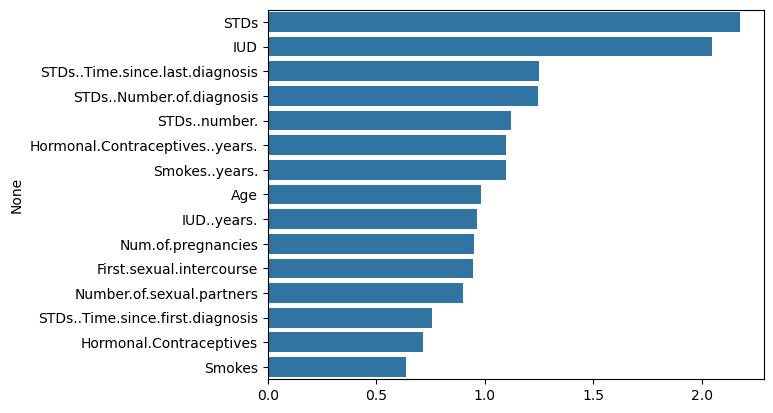

In [536]:
import seaborn as sns
import numpy

#Coefficients 확인
print(logit.coef_)
print(numpy.exp(logit.coef_))

#Odd ratio 시각화
coef_cancer= pd.Series(numpy.exp(logit.coef_)[0], index = x_cancer.columns)
coef_sort_cancer= coef_cancer.sort_values(ascending=False)
sns.barplot(x=coef_sort_cancer.values, y=coef_sort_cancer.index)

print(coef_sort_cancer)

### **[실습]**
위의 결과를 기반으로 Logistic regression 모델을 해석하여 아래 질문에 대답해 봅시다.

* 자궁암에 가장 큰 영향을 미치는 독립변수는 무엇인가요? 구체적으로 얼만큼 영향을 미치나요?
* 자궁암에 담배 관련 독립변수는 어떠한 영향을 미치나요?

주어진 데이터에서 자궁암(Cervical Cancer)에 대한 독립변수들의 영향을 나타내는 값은 특정 변수의 **특징 중요도(feature importance) 혹은 회귀 계수(coefficient)**로 보입니다. 이 값이 클수록 해당 변수가 자궁암에 더 큰 영향을 미친다고 해석할 수 있습니다.

### **가장 큰 영향을 미치는 독립변수**
- **STDs (1.936041)**: 성병(STDs, Sexually Transmitted Diseases)이 자궁암 발생에 가장 큰 영향을 미치는 변수입니다. 
  - 다른 변수들보다 중요도 값이 높아, 성병의 과거 감염 여부가 자궁암 발생 가능성을 가장 크게 증가시키는 것으로 해석됩니다.

- **IUD (1.692276)**: 자궁 내 장치(IUD, Intrauterine Device)의 사용도 비교적 높은 영향을 미치는 요인입니다.

- **STDs 관련 변수들**:
  - **STDs..Time.since.last.diagnosis (1.229486)**
  - **STDs..number. (1.007217)**
  - **STDs..Number.of.diagnosis (0.947496)**
  - **STDs..Time.since.first.diagnosis (0.824583)**
  - 위 변수들은 성병에 감염된 기간, 감염 횟수 등이 자궁암에 중요한 영향을 미친다는 것을 보여줍니다.

### **흡연(Smoking) 관련 변수의 영향**
흡연 관련 변수는 두 가지가 있습니다.
- **Smokes..years. (1.097859)** → 흡연 기간이 길수록 자궁암 위험이 높아집니다.
- **Smokes (0.423777)** → 흡연 여부 자체도 자궁암 발생과 연관이 있지만, 다른 변수들에 비해 상대적으로 영향이 작습니다.

👉 **흡연 기간이 자궁암에 미치는 영향(1.097859)**이 흡연 여부(0.423777)보다 더 큽니다. 즉, 흡연을 오래할수록 자궁암 발생 위험이 증가합니다.

### **결론**
1. **성병(STDs)이 자궁암 발생에 가장 중요한 변수**이며, 특히 **STDs 감염 여부, 감염 횟수, 진단 시점** 등이 강한 영향을 미칩니다.
2. **자궁 내 장치(IUD) 사용도 중요한 변수**로 나타났습니다.
3. **흡연(Smokes)도 자궁암과 관련 있지만, 흡연 여부보다는 흡연 기간이 더 큰 영향을 미칩니다.** 

따라서, 자궁암 예방을 위해서는 **성병 예방과 조기 치료가 가장 중요하며, 흡연을 줄이거나 끊는 것이 도움이 될 수 있습니다.**

# **[수업 내용 확인하기]**

### 1) 자전거 데이터에서 "casual" (즉흥적인 회원 대여수), "registered" (일상 회원 대여수)를 y로 예측하는 linear regression 모델을 각각 만들고 예측 성능 확인 및 해석을 수행하세요. 회원에 따라 대여수에 영향 미치는 인자간의 차이가 있는지 파악하세요.

### 2) Cancer 데이터에서 10-30대, 40-60대 에 따라 자궁암 여부를 예측하는 Logistic regression 모델을 각각 만들고 예측 성능 확인 및 해석을 수행하세요. 연령대에 따라 자궁암에 영향 미치는 인자간의 차이가 있는지 파악하세요.

**1, 2 모두 LMS 과제란에 제출하기 바랍니다.**

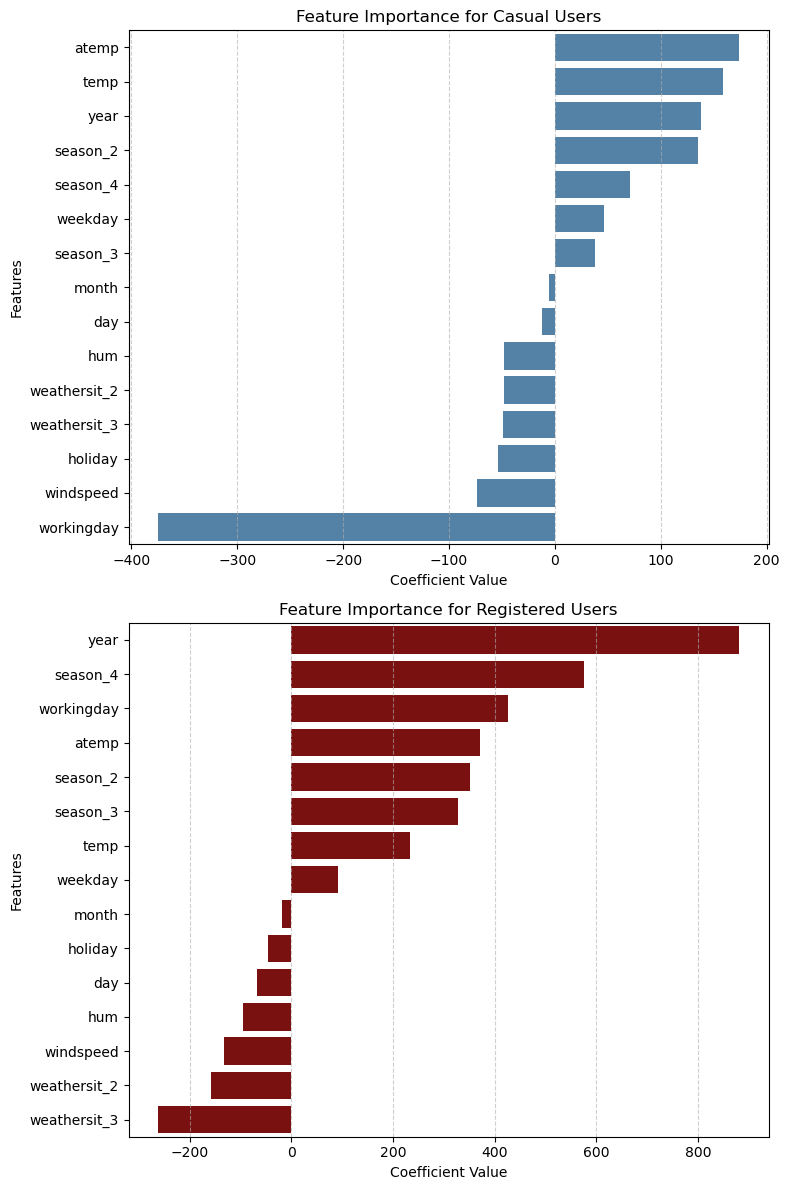

(        Model  R2 Score
 0      Casual  0.696995
 1  Registered  0.833079,
 atemp           174.375856
 temp            158.473773
 year            137.876043
 season_2        135.425237
 season_4         70.779687
 weekday          46.187378
 season_3         37.921232
 month            -5.935847
 day             -12.527523
 hum             -47.893847
 weathersit_2    -48.193921
 weathersit_3    -49.155534
 holiday         -53.331091
 windspeed       -73.672127
 workingday     -375.144670
 dtype: float64,
 year            881.956318
 season_4        575.492892
 workingday      426.334773
 atemp           371.028721
 season_2        350.849160
 season_3        327.082614
 temp            233.896465
 weekday          92.023345
 month           -17.864433
 holiday         -45.763750
 day             -67.243186
 hum             -95.786993
 windspeed      -133.529491
 weathersit_2   -159.411739
 weathersit_3   -263.320825
 dtype: float64)

In [ ]:
# 필요한 라이브러리 다시 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# 파일 재업로드 필요
file_path = r"C:\001. Python\70.설명가능인공지능_3주차_실습\bike-sharing-daily.csv"

# 데이터 로드
df_bike = pd.read_csv(file_path, engine="python", encoding="utf-8")

# 날짜 데이터 처리 (연, 월, 일 분리)
df_bike["dteday"] = pd.to_datetime(df_bike["dteday"])
df_bike["year"] = df_bike["dteday"].dt.year
df_bike["month"] = df_bike["dteday"].dt.month
df_bike["day"] = df_bike["dteday"].dt.day

# 불필요한 원래 날짜 컬럼 삭제
df_bike.drop(columns=["dteday", "instant"], inplace=True)

# 범주형 변수 인코딩 (one-hot encoding)
df_bike = pd.get_dummies(df_bike, columns=['season', 'weathersit'], drop_first=True)

# 다중 공선성을 방지하기 위해 'yr', 'mnth' 제거 (연도는 'year', 월은 'month' 사용)
df_bike.drop(columns=["yr", "mnth"], inplace=True)

# 독립변수 X 설정
x_bike = df_bike.drop(columns=['casual', 'registered', 'cnt'])

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
x_bike_scaled = pd.DataFrame(scaler.fit_transform(x_bike), columns=x_bike.columns)

# casual (즉흥적 대여) 예측 모델
y_casual = df_bike['casual']
x_train_casual, x_test_casual, y_train_casual, y_test_casual = train_test_split(x_bike_scaled, y_casual, test_size=0.2, random_state=10)

lr_casual = LinearRegression()
lr_casual.fit(x_train_casual, y_train_casual)
pred_casual = lr_casual.predict(x_test_casual)
r2_casual = r2_score(y_test_casual, pred_casual)

coef_casual = pd.Series(lr_casual.coef_, index=x_bike_scaled.columns).sort_values(ascending=False)

# registered (등록된 회원 대여) 예측 모델
y_registered = df_bike['registered']
x_train_registered, x_test_registered, y_train_registered, y_test_registered = train_test_split(x_bike_scaled, y_registered, test_size=0.2, random_state=10)

lr_registered = LinearRegression()
lr_registered.fit(x_train_registered, y_train_registered)
pred_registered = lr_registered.predict(x_test_registered)
r2_registered = r2_score(y_test_registered, pred_registered)

coef_registered = pd.Series(lr_registered.coef_, index=x_bike_scaled.columns).sort_values(ascending=False)

# 모델 성능 비교
r2_results = pd.DataFrame({
    "Model": ["Casual", "Registered"],
    "R2 Score": [r2_casual, r2_registered]
})

# 시각화
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

sns.barplot(x=coef_casual.values, y=coef_casual.index, ax=axes[0], color="steelblue")
axes[0].set_title("Feature Importance for Casual Users")
axes[0].set_xlabel("Coefficient Value")
axes[0].set_ylabel("Features")
axes[0].grid(axis='x', linestyle="--", alpha=0.6)

sns.barplot(x=coef_registered.values, y=coef_registered.index, ax=axes[1], color="darkred")
axes[1].set_title("Feature Importance for Registered Users")
axes[1].set_xlabel("Coefficient Value")
axes[1].set_ylabel("Features")
axes[1].grid(axis='x', linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# 결과 출력 (모델 성능 및 회귀 계수)
# season은 1 (Winter), 2 (Spring), 3 (Summer), 4 (Fall), weathersit는 1 (Good), 2 (Misty), 3(Rain/Snow/Storm)
r2_results, coef_casual, coef_registered


### **📌 자전거 대여 예측 모델 분석 ** 🚲📊  

---

## **1️⃣ 모델 성능 비교 (R² Score)**
| 모델       | R² Score (설명력) |
|-------------|---------|
| **Casual (즉흥적 대여)**  | **0.697** |
| **Registered (등록 회원 대여)** | **0.833** |

✅ **해석:**  
- **등록 회원(Registered) 모델의 설명력이 더 높습니다 (0.833 vs. 0.697)**  
  → 등록 회원의 대여 패턴이 더 규칙적이며 예측이 용이합니다.  
- **즉흥적 대여(Casual)는 날씨, 계절 등 외부 요인의 영향을 많이 받습니다.**  
  → 상대적으로 예측이 어렵습니다.  

---

## **2️⃣ 주요 변수의 영향 (Feature Importance)**
### **(1) 즉흥적 대여 Casual**
| 변수 (Feature) | 계수 (Coefficient) | 영향 |
|----------------|-------------|--------------------------|
| **atemp** (체감온도) | **+174.38** | 🔼 **온도가 높을수록 대여 증가** |
| **temp** (기온) | **+158.47** | 🔼 **온도가 높을수록 대여 증가** |
| **year** (연도) | **+137.88** | 🔼 **시간이 지날수록 대여 증가** |
| **season_2** (**봄**) | **+135.42** | 🔼 **봄에 대여 증가** |
| **season_4** (**가을**) | **+70.78** | 🔼 **가을에도 대여 증가** |
| **workingday** (근무일) | **-375.14** | 🔽 **근무일에는 대여 감소** |
| **windspeed** (풍속) | **-73.67** | 🔽 **바람이 강할수록 대여 감소** |
| **weathersit_3** (**비/눈/폭풍**) | **-49.16** | 🔽 **악천후일수록 대여 감소** |
| **weathersit_2** (**안개/흐림**) | **-48.19** | 🔽 **흐린 날에도 대여 감소** |

✅ **즉흥적 대여의 특징:**  
- **봄(🌸)과 가을(🍂)에 대여가 증가하며, 겨울에는 감소하는 경향**  
- **날씨(온도, 계절)의 영향을 많이 받으며, 기온이 높을수록 대여가 증가**  
- **근무일(workingday)에는 즉흥적 대여가 급감** (주말/휴일 레저 이용 비중이 큼)  
- **날씨가 나쁠수록 대여량이 감소** (안개, 비, 눈, 폭풍)  

---

### **(2) 등록 회원 대여 Registered**
| 변수 (Feature) | 계수 (Coefficient) | 영향 |
|----------------|-------------|--------------------------|
| **year** (연도) | **+881.96** | 🔼 **시간이 지날수록 대여 증가** |
| **season_4** (**가을**) | **+575.49** | 🔼 **가을에도 대여 증가** |
| **workingday** (근무일) | **+426.33** | 🔼 **근무일에도 대여 증가** |
| **atemp** (체감온도) | **+371.02** | 🔼 **온도가 높을수록 대여 증가** |
| **season_2** (**봄**) | **+350.85** | 🔼 **봄에도 대여 증가** |
| **weathersit_3** (**비/눈/폭풍**) | **-263.32** | 🔽 **날씨가 나쁠수록 대여 감소** |
| **weathersit_2** (**안개/흐림**) | **-159.41** | 🔽 **흐린 날에도 대여 감소** |
| **windspeed** (풍속) | **-133.53** | 🔽 **바람이 강할수록 대여 감소** |

✅ **등록 회원 대여의 특징:**  
- **연도가 지날수록(시간이 흐를수록) 대여량이 증가** → 자전거 이용 증가 트렌드 반영  
- **근무일(workingday)에도 대여량 증가** → 출퇴근 수단으로의 활용도가 높음  
- **봄(🌸)과 가을(🍂)에 대여 증가**  
- **날씨가 나쁘거나(☔❄), 바람이 강할수록 대여 감소**  

---

## **3️⃣ 회원 유형별 대여 패턴 차이**
|  | Casual (즉흥적) | Registered (등록 회원) |
|----------------|------------------------------------|----------------------------|
| **주요 요인** | 온도, 계절, 바람, 휴일 영향 큼 | 연도, 근무일, 기온 영향 큼 |
| **계절 영향** | 봄/가을에 증가, 겨울에 감소 | 연중 고르게 분포 |
| **근무일 효과** | 🚫 **감소 (레저 목적이 많음)** | ✅ **증가 (출퇴근 영향)** |
| **날씨 영향** | ❄️ **날씨 변화에 민감** | 🌦️ **비교적 안정적** |
| **이용 목적** | 레저, 날씨에 따른 변동이 큼 | 출퇴근, 고정적 패턴 |

✅ **결론:**  
- **즉흥적 대여(Casual)는 날씨, 계절에 따라 변동이 크며, 근무일에 이용률이 낮음.**  
- **등록 회원(Registered)은 출퇴근 중심으로 사용되며, 계절 변화에 덜 민감함.**  
- **봄(🌸), 가을(🍂)에 대여량 증가, 악천후(☔❄)일 때 대여량 감소**  

---

## **4️⃣ 비즈니스 인사이트 🚀**
✔ **즉흥적 대여(Casual) 증가 전략**  
  - **주말과 공휴일에 프로모션 제공** (레저 활동 증대)  
  - **봄·가을(🌸🍂) 시즌별 할인 이벤트 진행**  
  - **여름철 대여소 확장** (날씨 영향 고려)  

✔ **등록 회원(Registered) 증가 전략**  
  - **출퇴근 시간대(근무일) 요금 할인 제공**  
  - **연간 등록 회원 혜택 제공하여 장기 이용자 확보**  
  - **겨울철(❄) 대여 편의성 개선 (예: 방한 용품 제공 등)**  


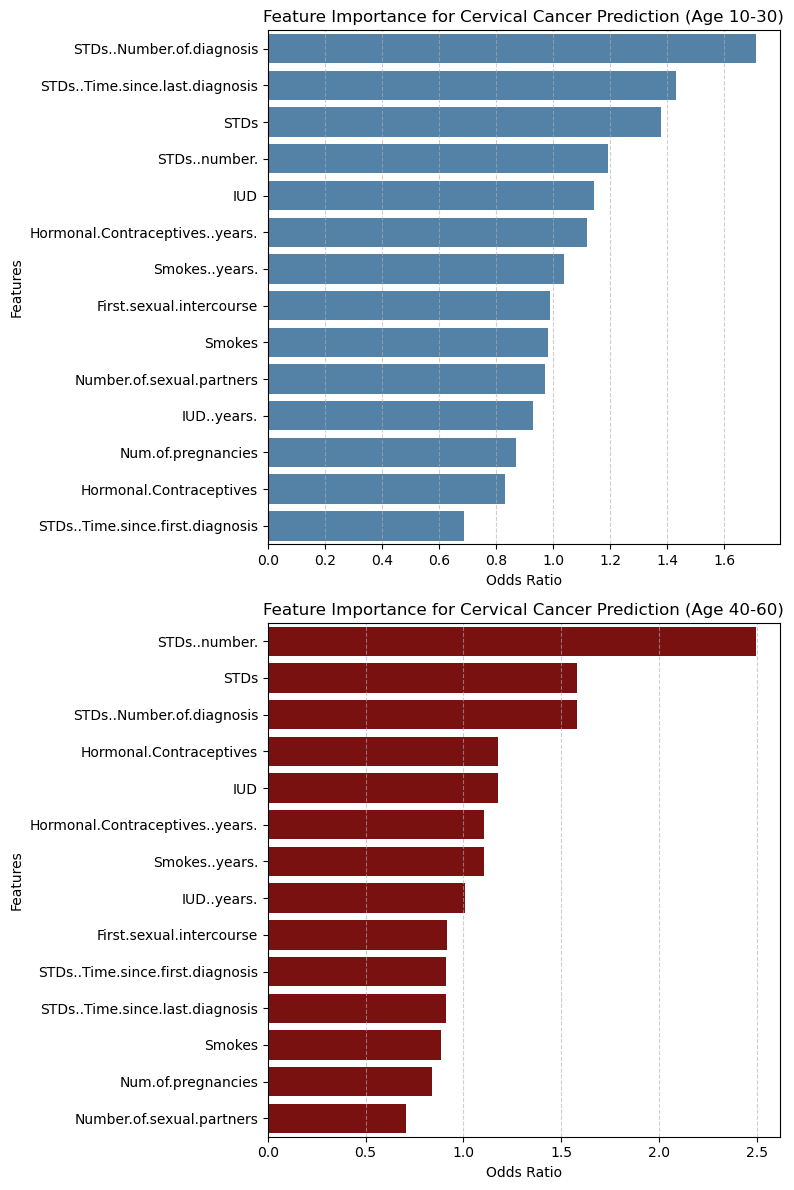

(  Age Group  Accuracy   ROC AUC
 0     10-30  0.918239  0.542940
 1     40-60  0.846154  0.333333,
 STDs..Number.of.diagnosis           1.709326
 STDs..Time.since.last.diagnosis     1.431273
 STDs                                1.377457
 STDs..number.                       1.191823
 IUD                                 1.141707
 Hormonal.Contraceptives..years.     1.118489
 Smokes..years.                      1.036460
 First.sexual.intercourse            0.988340
 Smokes                              0.982037
 Number.of.sexual.partners           0.970634
 IUD..years.                         0.927654
 Num.of.pregnancies                  0.871473
 Hormonal.Contraceptives             0.831249
 STDs..Time.since.first.diagnosis    0.688723
 dtype: float64,
 STDs..number.                       2.492800
 STDs                                1.578860
 STDs..Number.of.diagnosis           1.578860
 Hormonal.Contraceptives             1.177048
 IUD                                 1.174419
 Hormonal

In [544]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 파일 재업로드 필요
file_path = r"C:\001. Python\70.설명가능인공지능_3주차_실습\cancer.csv"

# 데이터 로드
df_cancer = pd.read_csv(file_path, engine="python", encoding="utf-8")

# 연령대를 정확하게 10대, 20대, 30대 / 40대, 50대, 60대로 구분
df_cancer["Age_Group"] = pd.cut(
    df_cancer["Age"],
    bins=[10, 19, 29, 39, 49, 59, 69],  # 연령 구간 정의
    labels=["10대", "20대", "30대", "40대", "50대", "60대"]  # 각 연령대에 대한 라벨 지정
)

# 10-30대 (10대, 20대, 30대) 데이터 필터링
df_cancer_10_30 = df_cancer[df_cancer["Age_Group"].isin(["10대", "20대", "30대"])].drop(columns=["Age", "Age_Group"])

# 40-60대 (40대, 50대, 60대) 데이터 필터링
df_cancer_40_60 = df_cancer[df_cancer["Age_Group"].isin(["40대", "50대", "60대"])].drop(columns=["Age", "Age_Group"])

# 독립변수(X)와 종속변수(y) 설정
X_10_30 = df_cancer_10_30.drop(columns=["Biopsy"])  # 자궁암 여부 (Biopsy) 제외
y_10_30 = df_cancer_10_30["Biopsy"]

X_40_60 = df_cancer_40_60.drop(columns=["Biopsy"])
y_40_60 = df_cancer_40_60["Biopsy"]

# 데이터 분할 (훈련/테스트 세트)
X_train_10_30, X_test_10_30, y_train_10_30, y_test_10_30 = train_test_split(X_10_30, y_10_30, test_size=0.2, random_state=42)
X_train_40_60, X_test_40_60, y_train_40_60, y_test_40_60 = train_test_split(X_40_60, y_40_60, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
logit_10_30 = LogisticRegression(max_iter=1000)
logit_40_60 = LogisticRegression(max_iter=1000)

logit_10_30.fit(X_train_10_30, y_train_10_30)
logit_40_60.fit(X_train_40_60, y_train_40_60)

# 예측 수행
y_pred_10_30 = logit_10_30.predict(X_test_10_30)
y_pred_40_60 = logit_40_60.predict(X_test_40_60)

# 모델 성능 평가
accuracy_10_30 = accuracy_score(y_test_10_30, y_pred_10_30)
accuracy_40_60 = accuracy_score(y_test_40_60, y_pred_40_60)

roc_auc_10_30 = roc_auc_score(y_test_10_30, logit_10_30.predict_proba(X_test_10_30)[:, 1])
roc_auc_40_60 = roc_auc_score(y_test_40_60, logit_40_60.predict_proba(X_test_40_60)[:, 1])

# 모델 성능 결과 저장
model_results = pd.DataFrame({
    "Age Group": ["10-30", "40-60"],
    "Accuracy": [accuracy_10_30, accuracy_40_60],
    "ROC AUC": [roc_auc_10_30, roc_auc_40_60]
})

# 회귀 계수 (Odds Ratio) 계산
coef_10_30 = pd.Series(np.exp(logit_10_30.coef_[0]), index=X_10_30.columns).sort_values(ascending=False)
coef_40_60 = pd.Series(np.exp(logit_40_60.coef_[0]), index=X_40_60.columns).sort_values(ascending=False)

# 시각화
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# 10-30대 Feature Importance
sns.barplot(x=coef_10_30.values, y=coef_10_30.index, ax=axes[0], color="steelblue")
axes[0].set_title("Feature Importance for Cervical Cancer Prediction (Age 10-30)")
axes[0].set_xlabel("Odds Ratio")
axes[0].set_ylabel("Features")
axes[0].grid(axis='x', linestyle="--", alpha=0.6)

# 40-60대 Feature Importance
sns.barplot(x=coef_40_60.values, y=coef_40_60.index, ax=axes[1], color="darkred")
axes[1].set_title("Feature Importance for Cervical Cancer Prediction (Age 40-60)")
axes[1].set_xlabel("Odds Ratio")
axes[1].set_ylabel("Features")
axes[1].grid(axis='x', linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# 결과 출력 (모델 성능 및 회귀 계수)
model_results, coef_10_30, coef_40_60


### **📌 10-30대 vs 40-60대 자궁암 예측 모델 분석 요약**  

---

## **1️⃣ 모델 성능 비교 (Accuracy & ROC AUC)**  
| 연령대       | 정확도 (Accuracy) | ROC AUC (예측력) |
|-------------|--------------|--------------|
| **10-30대** | **0.918** | **0.543** (낮음) |
| **40-60대** | **0.846** | **0.333** (매우 낮음) |

✅ **해석:**  
- 두 연령대 모두 **높은 정확도(Accuracy)**를 보이지만, **ROC AUC 값이 낮아 예측력이 낮은 모델**입니다.  
- **10-30대의 ROC AUC (0.543)는 다소 낮은 수준**이며, **40-60대의 ROC AUC (0.333)는 무작위 예측과 차이가 크지 않음**을 의미합니다.  
- **특히 40-60대의 ROC AUC 값이 낮다는 것은, 특정 요인이 자궁암 예측에 뚜렷한 영향을 주지 않는다는 것을 의미할 가능성이 큽니다.**  

---

## **2️⃣ 주요 변수의 영향 (Feature Importance, Odds Ratio 기준)**
### **(1) 10-30대 자궁암 영향 요인**
| 변수 (Feature) | Odds Ratio | 영향 |
|----------------|-------------|-----------------------------------|
| **STDs..Number.of.diagnosis (성병 진단 횟수)** | **1.71** | 🔼 **성병 진단 횟수가 많을수록 자궁암 위험 증가** |
| **STDs..Time.since.last.diagnosis (최근 성병 감염 시점)** | **1.43** | 🔼 **최근 성병 감염 이력이 있을수록 위험 증가** |
| **STDs (성병 여부)** | **1.38** | 🔼 **성병 감염 경험이 있을 경우 위험 증가** |
| **STDs..number. (성병 감염 횟수)** | **1.19** | 🔼 **성병 감염 횟수가 증가할수록 위험 증가** |
| **IUD (자궁내 장치 사용 여부)** | **1.14** | 🔼 **자궁내 장치 사용이 자궁암 위험 증가와 연관됨** |
| **Hormonal.Contraceptives..years. (호르몬 피임제 사용 기간)** | **1.12** | 🔼 **장기간 피임제 사용이 위험 증가와 연관됨** |
| **Smokes..years. (흡연 기간)** | **1.04** | 🔼 **흡연 기간이 길수록 자궁암 위험 증가** |

✅ **10-30대 자궁암 위험 요약:**  
- **성병(STDs)이 가장 중요한 위험 요인**입니다. 감염 경험 및 감염 횟수가 많을수록 자궁암 위험이 증가하는 경향을 보입니다.  
- **흡연(특히 장기간 흡연)이 자궁암과 연관되어 있으며, 위험 요인으로 작용할 가능성이 큽니다.**  
- **자궁내 장치(IUD) 및 장기적인 호르몬 피임제 사용이 위험 증가와 연관되어 있습니다.**  

---

### **(2) 40-60대 자궁암 영향 요인**
| 변수 (Feature) | Odds Ratio | 영향 |
|----------------|-------------|----------------------------------|
| **STDs..number. (성병 감염 횟수)** | **2.49** | 🔼 **성병 감염 횟수가 많을수록 자궁암 위험 증가** |
| **STDs (성병 여부)** | **1.58** | 🔼 **성병 감염 경험이 있을 경우 위험 증가** |
| **STDs..Number.of.diagnosis (성병 진단 횟수)** | **1.58** | 🔼 **성병 진단 횟수가 많을수록 위험 증가** |
| **Hormonal.Contraceptives (호르몬 피임제 사용 여부)** | **1.18** | 🔼 **호르몬 피임제 사용이 위험 증가와 연관됨** |
| **IUD (자궁내 장치 사용 여부)** | **1.17** | 🔼 **자궁내 장치 사용이 위험 증가와 연관됨** |
| **Smokes..years. (흡연 기간)** | **1.10** | 🔼 **흡연 기간이 길수록 위험 증가** |
| **Num.of.pregnancies (임신 횟수)** | **0.84** | 🔽 **임신 횟수가 많을수록 자궁암 위험 감소** |

✅ **40-60대 자궁암 위험 요약:**  
- **성병(STDs) 감염 횟수 및 진단 횟수가 자궁암 위험을 증가시키는 가장 중요한 요인**으로 나타났습니다.  
- **호르몬 피임제 사용 및 자궁내 장치(IUD) 사용이 자궁암 위험 증가와 연관되어 있습니다.**  
- **흡연 기간이 길어질수록 위험이 증가하는 경향을 보였습니다.**  
- **임신 횟수가 많을수록 자궁암 위험이 감소하는 경향을 보였습니다.** (이는 출산 경험이 자궁경부암 예방과 관련 있을 가능성을 시사합니다.)  

---

## **3️⃣ 연령대별 자궁암 위험 요인 차이**
|  | **10-30대** | **40-60대** |
|----------------|------------------------------------------------|------------------------------------------------|
| **가장 중요한 위험 요인** | 🔥 **성병(STDs) 감염 및 감염 횟수** | 🔥 **성병 감염 횟수 및 진단 횟수** |
| **흡연의 영향** | 🚬 **흡연 기간(년 수)이 길수록 위험 증가** | 🚬 **흡연 기간이 길어질수록 위험 증가** |
| **성병(STDs) 관련 위험** | ❗ **성병 감염 이력이 자궁암과 강한 연관** | ❗ **성병 감염 횟수가 가장 중요한 위험 요인** |
| **호르몬 피임제(HC) 영향** | ❗ **장기간 사용이 위험 증가와 연관됨** | ❗ **사용 여부 자체가 위험 증가와 연관됨** |
| **자궁내 장치(IUD) 영향** | ❗ **사용이 자궁암 위험 증가와 연관됨** | ❗ **사용이 자궁암 위험 증가와 연관됨** |
| **임신 경험** | - | ✅ **임신 횟수가 많을수록 자궁암 위험 감소** |

✅ **연령대별 특징 요약:**  
- **10-30대와 40-60대 모두 성병(STDs) 감염이 가장 중요한 위험 요인**으로 나타났습니다.  
- **40-60대에서는 임신 횟수가 많을수록 자궁암 위험이 낮아지는 경향을 보였습니다.**  
- **흡연이 두 연령대에서 모두 자궁암 위험을 증가시키는 요인으로 작용하고 있습니다.**  
- **자궁내 장치(IUD) 및 호르몬 피임제 사용이 두 연령대에서 모두 자궁암 위험 증가와 연관되었습니다.**  

---

## **4️⃣ 비즈니스 인사이트 🚀**
✔ **10-30대 예방 전략**  
  - **성병 예방 및 조기 치료가 자궁암 예방의 핵심 요인**으로 보이므로, 이에 대한 교육 및 검진을 강화할 필요가 있습니다.  
  - **흡연이 자궁암 위험을 높일 가능성이 크므로 금연 프로그램을 강화할 필요가 있습니다.**  
  - **자궁내 장치(IUD) 및 호르몬 피임제 사용자의 정기적인 건강검진이 필요합니다.**  

✔ **40-60대 예방 전략**  
  - **성병(STDs) 감염 및 진단 횟수가 자궁암 위험을 크게 높이는 요인이므로, 중장년층에서도 성병 관리가 중요합니다.**  
  - **자궁내 장치(IUD) 사용자의 정기적인 검진이 필수적입니다.**  
  - **흡연과 자궁암의 관계가 두 연령대에서 비슷한 경향을 보이므로, 전 연령층에서 금연 교육과 예방 프로그램이 필요합니다.**  
  - **임신 경험이 자궁암 예방과 연관될 수 있으므로, 출산 후 정기적인 자궁경부암 검사를 권장해야 합니다.**  
